# PM Homework 10

**FBA Quant 이의형**

---

## Assignment 1. Summarize Text Book

- [Investment Science] Chap 10. Risk Measures

### Chap 10.1 Value at Risk

$X$:$T$ 시점에 포지션 가치의 변화 (위험 관점에서 $-X$에 집중)  
$h$: loss tolerance  
confidence level: $1 - h$  

$\text {VaR}_h(X) = \text {min}_h \{ V:P[-X > V] \le h]\}$ 

$\text {VaR}_h(X) = \text {min}_h \{ V:P[-X  \le V] > 1-h]\}$  

(-X보다 더 큰 손실 V가 날 가능성은 h보다 작다.)  

cumulative prebability distribution: $F_X(x) = P[X \le x]$  

inverse function $x = F^{-1}_X(h)$  

$\text {VaR}_h(X) = -F_X^{-1}(h)$

**Property**  
- VaR은 쉽게 이해 가능하며, 잠재적 손실을 직관적으로 반영  
- VaR은 left tail에만 의존하므로 이익 예측 없이 손실에만 집중  
- AA, A 등 광범위한 범주로 정의하지 않고 모든 가정을 확률로 반환  

### Chap 10.2 Computation of Value at Risk

VaR을 결정하려면 포지션 X의 확률 분포에 대한 정보가 필요하다.  

일반적으로 포트폴리오 내 개별 자산의 리스크는 정규 분포를 근사적으로 따른다는 가정이 존재한다.  
가정을 적용했을 때, 평균 $\mu$와 분산 $\sigma^2$이 주어지면 다음 정리를 사용할 수 있다.  

$\text {VaR}_h(X) = - \sigma F_N^{-1} (h) - \mu$ ($F_N$은 표준 정규 분포의 누적 확률 분포)  

일반적으로 $\mu$가 매우 작을 경우, 변동성만을 고려한다. (보통 평균 0으로 가정)  

예시) 10 mil의 포지션 $X$의 h=0.05 10일 VaR 계산 (일별 변동성 2% (연환산 약 30%)) 
- $\sigma = 0.02 * \sqrt (10) = 0.0632$  
- $\text {VaR}_{0.05}(X) = \text {10 mil} * -0.0632 * F_N^{-1} (0.05) \text {(=1.65)}$

만약 다른 포지션을 추가한다면 correlation으로 전체 변동성을 구해서 계산한다.  

$\sigma_{A+B} < \sigma_A + \sigma_B$ 이기 때문에, $\text {VaR}_h(X_{A+B}) \le \text {VaR}_h(X_A) + \text {VaR}_h(X_B)$

주의: 정규 분포 가정은 현실적이지 않을 수 있다. -> fat tail risk  

**이산 분포**  

$X$가 이산 분포이면 $X$값을 정렬하여 누적 합계를 만든 뒤, $h$보다 클 때의 $X$를 VaR로 설정 (같으면 손실이 작은 쪽으로 한 단계 더)

### Chap 10.3 Criticisms of VaR

**Diversification Failure**  

정규 분포가 아닌 경우, 포지션 분산의 장점이 VaR에 반영되지 않을 수 있다.  

(Problem 2)  

**Poor Assessment of Risk**  

일부 손실이 VaR보다 훨씬 클 수도 있다.  

최악의 경우에서 최소 손실을 알 수 있을 뿐, 진짜 최악의 상황에서는 어떻게 될지 모른다.  

**Discontinuous Value**  

$h$에 민감할 수 있으며, 이산 값의 경우 더욱 더 민감해진다.

### Chap 10.4 Coherent Risk Measures

Risk Measure가 이상적으로 갖춰야 할 성질을 정확히 명시한다.  

- Translation Invariance: $RM(L+x)=RM(L)+x$  
- Sub-additivity: $RM(L_1 + L_2) \le RM(L_1) + RM(L_2)$
- Positive Homogeneity: $RM(tL) = tRM(L) \quad(t > 0)$  
- Monotonicity: almost surely $RM(L_1) \ge RM(L_2) \quad (L_1 \ge L_2)$

### Chap 10.5 Conditional Value at Risk

VaR로 측정한 손실보다 더 심한 손실 패턴을 설명할 수 있는 대안  
- 최악의 상황에서 최소 손실을 구하는 것이 아닌 전체 예상 손실을 구한다.(손실 구간 평균)  

$\text {CVaR}_h(X) = E[-X | X \le -\text {VaR}_h(X)]$  

$\text {CVaR}_h(X) \ge \text {VaR}_h(X)$

CVaR은 tail value at risk (TVaR), expected shortfall, conditional tail expectation (CTE)라고도 불린다.

---

## Assignment 2. Python Implement

The codes within‘VaR.ipynb’are the process of calculating VaR (Value at Risk).  
Adjust the desired parameters (Tickers, start, end, weights, initial_cap, confidence_level) and  Calculate the Portfolio's Value at Risk.  

질문 드릴 것이 있어 파라미터 수정 없이 제출

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

# Load Libraries and Set Parameters
tickers = ['AAPL' ,'MSFT' ,'AMZN' ,'GOOGL','TSLA'] 
start ='2010-12-31'
end ='2020-12-31'

weights =np.array([0.2,0.2,0.2,0.2,0.2])
initial_cap = 1000000

confidence_level = 0.05

In [27]:
# Calculate Daily Return
daily_return = yf.download(tickers, start, end)['Close'].pct_change()[1:]
daily_return

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2010-12-31,-0.003399,-0.015048,-0.008166,0.002154,0.004905
2011-01-03,0.021732,0.023444,0.017476,0.002508,-0.000375
2011-01-04,0.005219,0.004288,-0.003690,0.003931,0.001878
2011-01-05,0.008180,0.013026,0.011543,-0.003204,0.005999
2011-01-06,-0.000808,-0.008324,0.007273,0.029286,0.039135
...,...,...,...,...,...
2020-12-23,-0.006976,-0.006627,0.004656,-0.013039,0.008808
2020-12-24,0.007712,-0.003949,0.003431,0.007827,0.024443
2020-12-28,0.035766,0.035071,0.022951,0.009921,0.002901


In [28]:
# Create the Variance-Covariance Matrix
cov_matrix = daily_return.cov()
cov_matrix

,AAPL,AMZN,GOOGL,MSFT,TSLA
AAPL,0.000322,0.000158,0.000152,0.000161,0.000198
AMZN,0.000158,0.000397,0.000185,0.000172,0.000225
GOOGL,0.000152,0.000185,0.000263,0.000163,0.000183
MSFT,0.000161,0.000172,0.000163,0.000263,0.000190
TSLA,0.000198,0.000225,0.000183,0.000190,0.001216


In [29]:
# Calculate Portfolio Mean and Standard devidation
avg_return = daily_return.mean()
portfolio_mean = avg_return.dot(weights)
portfolio_std = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
print(f'{portfolio_mean:.4f}')
print(f'{portfolio_std:.4f}')

# calculate after 10 years of values
mean_cap = (1+ portfolio_mean) * initial_cap
std_cap = portfolio_std * initial_cap
print(f'${mean_cap:.0f}')
print(f'${std_cap:.0f}')

0.0014
0.0155
$1001362
$15538


In [30]:
# Find 'Z-score' using Inverse of the normal distribution culmulative function
z_alpha = norm.ppf(confidence_level, mean_cap, std_cap)
print(f'${z_alpha:.0f}')

$975804


In [31]:
# Calculate Value at Risk
Value_at_Risk = initial_cap - z_alpha
print(f'${Value_at_Risk:.0f}')
print(f'We have a level of 95% confidence to say that $1 million portfolio will not lose more than ${Value_at_Risk:.0f} in a day')

$24196
We have a level of 95% confidence to say that $1 million portfolio will not lose more than $24196 in a day


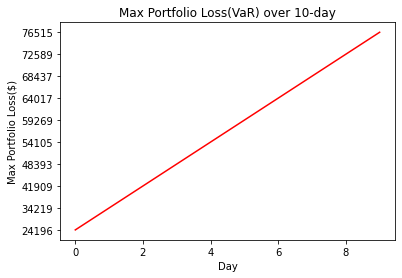

VaR of 10 days ['24196', '34219', '41909', '48393', '54105', '59269', '64017', '68437', '72589', '76515']
We have 95% confidence to say that $1 million portfolio willl not lose morew than $76515 within 10 days


In [32]:
# 10-day VaR
VaRs = []
n_day = 10

for n in range(n_day):
    VaRs.append(f'{Value_at_Risk * np.sqrt(n+1):.0f}')

plt.title('Max Portfolio Loss(VaR) over 10-day')
plt.xlabel('Day')
plt.ylabel('Max Portfolio Loss($)')
plt.plot(VaRs,'r')
plt.show()
print(f'VaR of 10 days {VaRs}')
print(f'We have 95% confidence to say that $1 million portfolio willl not lose morew than ${VaRs[-1]} within 10 days')

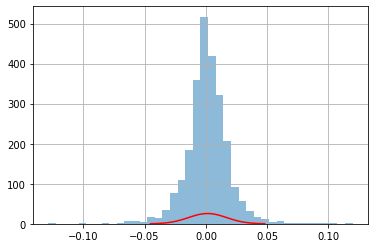

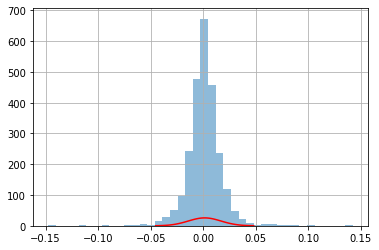

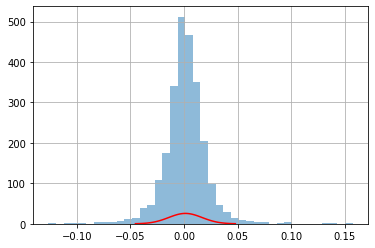

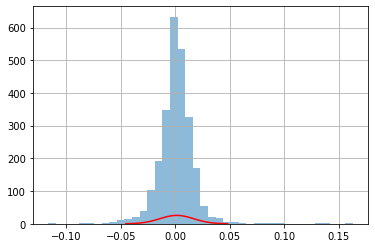

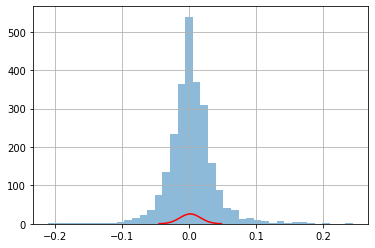

In [33]:
import seaborn as sns
for c in tickers:
    fig = plt.figure()
    daily_return[c].hist(bins=40, histtype='stepfilled', alpha=0.5)
    x = np.linspace(portfolio_mean - 3 * portfolio_std, portfolio_mean + 3 * portfolio_std, 100)
    plt.plot(x, norm.pdf(x, portfolio_mean, portfolio_std),'r')

## Assignment 3. Problems

### Problem. 1

A pension fund invests its endowment of \\$10 million in a position $X_A$, $X_B$ that follow a normal distribution.  
$X_A$, $X_B$ have volatility of 2%, 3% per day each and suppose that the returns on different days are independent.

**(a)** Find the the10-day VaR of this position $X_A$, $X_B$ at a confidence level of 95% each.

In [21]:
import numpy as np
from scipy.stats import norm

invest = 10
vol_a = 0.02
vol_b = 0.03
days = 10
h = 0.05
F_invs = -norm.ppf(1-h)

VaR_a = invest * -1 * vol_a * np.sqrt(days) * F_invs
VaR_b = invest * -1 * vol_b * np.sqrt(days) * F_invs

print(f'A: {VaR_a:.4f}')
print(f'B: {VaR_b:.4f}')

A: 1.0403
B: 1.5604


**(b)** If two positions are correlated with a correlation coefficient of ρ = 0.5.  
Find the the10-day overall($X_A+X_B$) VaR at a confidence level of 95%.

In [23]:
rho = 0.5

vol_ab = np.sqrt(vol_a**2 + 2*rho*vol_a*vol_b + vol_b**2)
VaR_ab = invest * -1 * vol_ab * np.sqrt(days) * F_invs

print(f'AB: {VaR_ab:.4f}')

AB: 2.2673


**(c)** Demonstrate the reduction in risk of a sum compared to the sum of the risks.  
Is diversifying a pension fund's position effective in reducing risk?

In [25]:
VaR_ab <= VaR_a + VaR_b

True

### Problem. 2

Consider the position at a confidence level of 95%

$X_1 = X_2 = \begin{cases}
  1  & \text{with prob 1/2} \\
  -1 & \text{with prob 1/2}
\end{cases}$  

$X = \frac {X_1 + X_2} 2 = \begin{cases}
  1  & \text{with prob 1/4} \\
  0 & \text{with prob 1/2} \\
  -1 & \text{with prob 1/4} \\
\end{cases}$

**(a)** Using the shortcut method, Find the VaR each positions.

$\text {VaR}_{0.05}(X_1) = 1$  

$\text {VaR}_{0.05}(X_2) = 1$  

$\text {VaR}_{0.05}(X) = 0$

**(b)** Is the diversified position safe?

$\text {VaR}_h(X) \le \text {VaR}_h(X_A) + \text {VaR}_h(X_B)$  

해당 경우에는 분산으로 인한 보상이 유효하지만, confidence level이 낮아지면 유효하지 않은 경우도 생긴다.

**cf. confidence level: 50%**

$\text {VaR}_h(X) > \text {VaR}_h(X_1) + \text {VaR}_h(X_2)$

**(c)** At a confidence level of 50%, show that CVaR rewards diversification.

$\text {VaR}_{0.5}(X_1) = -1$  

$\text {VaR}_{0.5}(X_2) = -1$  

$\text {VaR}_{0.5}(X) = 0$

$\text {CVaR}_{0.5}(X_1) = 1$  

$\text {CVaR}_{0.5}(X_2) = 1$  

$\text {CVaR}_{0.5}(X) = \frac 1 2 * 0 + \frac 1 2 * 1 = 0.5$  

$\text {CVaR}_h(X) \le \text {CVaR}_h(X_A) + \text {CVaR}_h(X_B)$  

---